In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect('../data/checking-logs.sqlite')

1. analyze only the users and not the admins
2. the fontsize and the figsize are still the same
3. night is from 0:00:00 to 03:59:59, morning is from 04:00:00 to 09:59:59, afternoon is from 10:00:00 to 16:59:59, evening is from 17:00:00 to 23:59:59
choose a palette that you really enjoy, you do not have to replicate it from the graph above

In [3]:
query = """
SELECT date,
    SUM(night) AS night,
    SUM(morning) AS morning,
    SUM(afternoon) AS afternoon,
    SUM(evening) AS evening
FROM (
    SELECT date, 
    CASE 
        WHEN daytime = "night" THEN daytime_count
        ELSE 0
    END AS night,
    CASE 
        WHEN daytime = "morning" THEN daytime_count
        ELSE 0
    END AS morning,
    CASE 
        WHEN daytime = "afternoon" THEN daytime_count
        ELSE 0
    END AS afternoon,
    CASE 
        WHEN daytime = "evening" THEN daytime_count
        ELSE 0
    END AS evening
    FROM
        (SELECT date(timestamp) AS date,
                CASE 
                    WHEN time(timestamp) 
                    BETWEEN "00:00:00" AND "03:59:59"
                    THEN "night"
                    WHEN time(timestamp) 
                    BETWEEN "04:00:00" AND "09:59:59"
                    THEN "morning"
                    WHEN time(timestamp) 
                    BETWEEN "10:00:00" AND "16:59:59"
                    THEN "afternoon"
                    WHEN time(timestamp) 
                    BETWEEN "17:00:00" AND "23:59:59"
                    THEN "evening"
                END AS daytime,
                COUNT(*) AS daytime_count
        FROM checker
        WHERE uid NOT LIKE 'admin_%'
        GROUP BY date, daytime)
    )
GROUP BY date
"""

In [4]:
df_daytime_count = pd.read_sql(query, con, index_col='date')
df_daytime_count

,night,morning,afternoon,evening
date,,,,
2020-04-17,0,13,10,0
2020-04-18,0,1,33,35
2020-04-19,2,4,16,11
2020-04-20,0,0,12,13
2020-04-21,0,0,0,25
2020-04-22,0,0,4,24
2020-04-23,2,6,15,20
2020-04-24,0,0,4,12
2020-04-25,1,21,33,49


In [5]:
con.close()

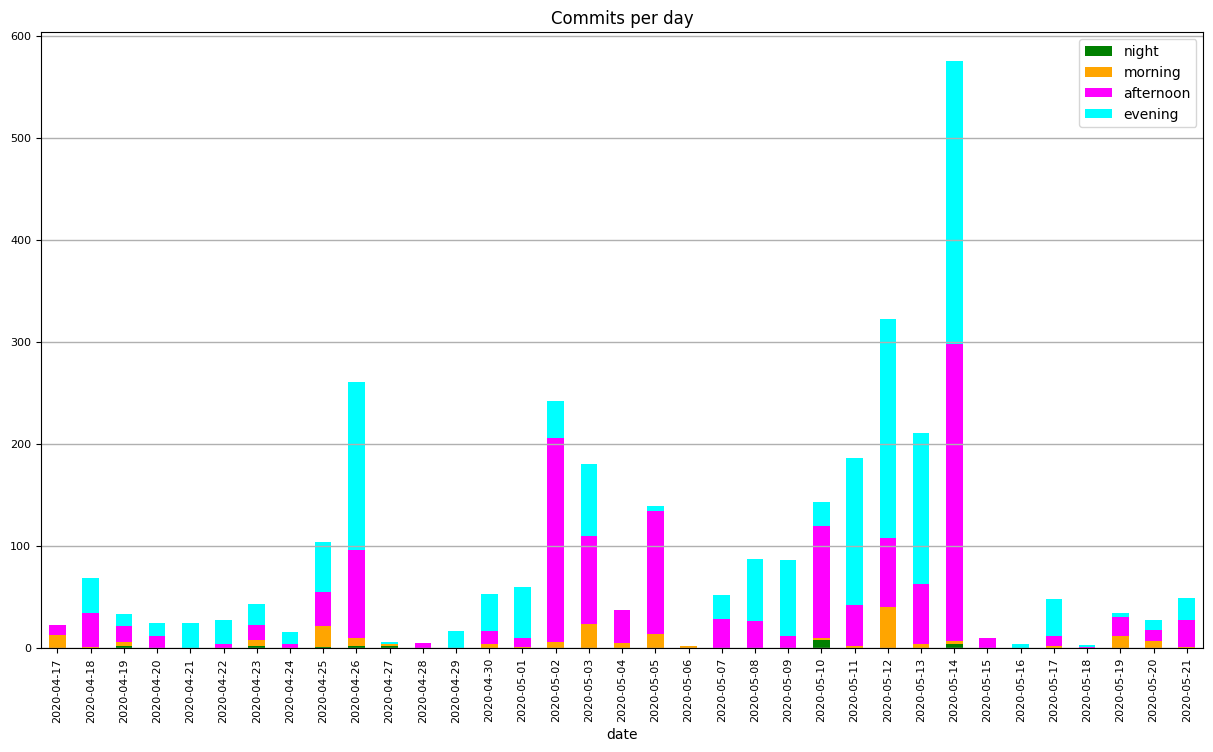

In [6]:
df_daytime_count.plot.bar(
    stacked=True,
    title='Commits per day',
    fontsize=8,
    figsize=(15,8),
    rot=90,
  color={
    'night': 'green',
    'morning': 'orange',
    'afternoon': 'magenta',
    'evening': 'cyan'
  }
).grid(axis='y', linewidth=1)


1. Afternoon and evening
2. The most number of commits: 2020-05-14
3. Yes